In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from math import sqrt

In [2]:
df1 = pd.read_csv('traincleaned.csv')

In [3]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.025077,0.042033,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.122230,-0.298088,2
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.178347,-0.375830,3
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.600277,-0.346677,6
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.824745,-0.259217,4


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
0                   200000 non-null float64
1                   200000 non-null float64
2                   200000 non-null float64
3                   200000 non-null float64
4                   200000 non-null float64
5                   200000 non-null float64
6                   200000 non-null float64
7                   200000 non-null float64
8                   200000 non-null float64
9                   200000 non-null float64
loan_amount         200000 non-null float64
applicant_income    200000 non-null float64
rate_spread         200000 non-null int64
dtypes: float64(12), int64(1)
memory usage: 19.8 MB


In [5]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000
mean,0.453525,0.531540,0.005410,0.009525,0.846310,0.152500,0.001190,0.730515,0.056365,0.213120,3.992973e-17,2.617209e-16,1.974370
std,0.497837,0.499005,0.073354,0.097130,0.360652,0.359506,0.034476,0.443693,0.230626,0.409513,1.000003e+00,1.000003e+00,1.593451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.930963e-01,-6.965148e-01,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.301305e-01,-3.175233e-01,1.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.864135e-01,-1.620397e-01,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.555084e-01,7.118587e-02,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.689038e+01,9.687922e+01,8.000000


In [6]:
df1.shape

(200000, 13)

In [7]:
array = df1.values

In [8]:
type(array)

numpy.ndarray

In [9]:
X = array[:,0:12]
y = array[:,12]

In [10]:
X.shape

(200000, 12)

In [11]:
y.shape

(200000,)

### Create Training for LGBM

In [12]:
trainingdata = lgb.Dataset(data=X, label=y)
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = ['mean_squared_error']
params['sub_feature'] = 0.5
params['num_leaves'] = 70
params['min_data'] = 50
params['max_depth'] = 7

model = lgb.train(params=params,train_set=trainingdata,num_boost_round=10000)

In [13]:
X_test = pd.read_csv('testmodified.csv')

In [14]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.665492,-0.218602
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.185659,0.774446
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.213116,0.273193
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.185004,-0.209144
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.239917,0.140787


In [15]:
X_test.shape

(200000, 12)

In [16]:
X_test = X_test.values

In [17]:
X_test

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.66549232, -0.21860183],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.18565904,  0.77444596],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.21311553,  0.27319326],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         2.89012382,  0.87847953],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.17813953, -0.05782267],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.68674007, -0.20914423]])

In [18]:
y_predict = model.predict(X_test)

In [19]:
y_predict

array([4.9713248 , 2.1148944 , 1.81431087, ..., 1.34596292, 1.29842186,
       1.11963311])

In [20]:
y_predict.shape

(200000,)

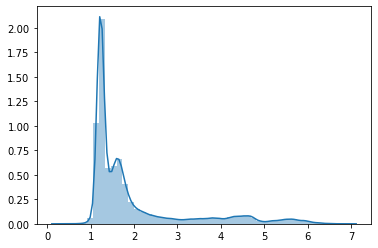

In [21]:
sns.distplot(y_predict)
plt.show()

In [22]:
MSE = mean_squared_error(y,y_predict)
print("Mean Squared Error is", MSE)

Mean Squared Error is 3.9205184272688594


In [23]:
RMSE = format(np.sqrt(MSE),'.3f')
print("RMSE is", RMSE)

RMSE is 1.980


In [24]:
MAE = mean_absolute_error(y,y_predict)
print("MAE is", MAE)

MAE is 1.3369981924521437


In [25]:
r2 = r2_score(y,y_predict)
print("R2 score is", r2)

R2 score is -0.544074655622254


In [26]:
lgbprediction = pd.DataFrame(y_predict)

In [27]:
lgbprediction

,0
0,4.971325
1,2.114894
2,1.814311
3,1.646431
4,1.575547
...,...
199995,1.652063
199996,4.707743
199997,1.345963
199998,1.298422


In [28]:
lgbprediction.to_csv('lgbresult.csv')